# Objective:Build  a model which predict the cost of insurance policy

Information:
dataset having 7 variable where 'age','bmi','charges' are quantitative variable and 'sex','smoker','region' are qualitative variable.Our main objective to build model which predict the cost of insurance policy.Charges is dependent variable and remaining six variables are independent variable .

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data import

In [2]:
data=pd.read_csv('c:\datasets\insurance.csv');data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# dimension of data
print(data.shape)

(1338, 7)


In [4]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
# is there any missing value in data
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Create dummy variable 

In [6]:
# numeric qualitative to category type
data['children']=data['children'].astype('category')

In [7]:
data2=pd.get_dummies(data, drop_first=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   charges           1338 non-null   float64
 3   sex_male          1338 non-null   uint8  
 4   children_1        1338 non-null   uint8  
 5   children_2        1338 non-null   uint8  
 6   children_3        1338 non-null   uint8  
 7   children_4        1338 non-null   uint8  
 8   children_5        1338 non-null   uint8  
 9   smoker_yes        1338 non-null   uint8  
 10  region_northwest  1338 non-null   uint8  
 11  region_southeast  1338 non-null   uint8  
 12  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(1), uint8(10)
memory usage: 44.6 KB


# Spliting the data

In [8]:
# spliting data as train and test with proportion 70:30 
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(data2,test_size=0.3,random_state=3)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 522 to 1273
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               936 non-null    int64  
 1   bmi               936 non-null    float64
 2   charges           936 non-null    float64
 3   sex_male          936 non-null    uint8  
 4   children_1        936 non-null    uint8  
 5   children_2        936 non-null    uint8  
 6   children_3        936 non-null    uint8  
 7   children_4        936 non-null    uint8  
 8   children_5        936 non-null    uint8  
 9   smoker_yes        936 non-null    uint8  
 10  region_northwest  936 non-null    uint8  
 11  region_southeast  936 non-null    uint8  
 12  region_southwest  936 non-null    uint8  
dtypes: float64(2), int64(1), uint8(10)
memory usage: 38.4 KB


In [10]:
df_train.shape

(936, 13)

# Visualisation of numeric variable Relationship

In [11]:
# numeric data obtain
data2num=df_train[['age','bmi','charges']]

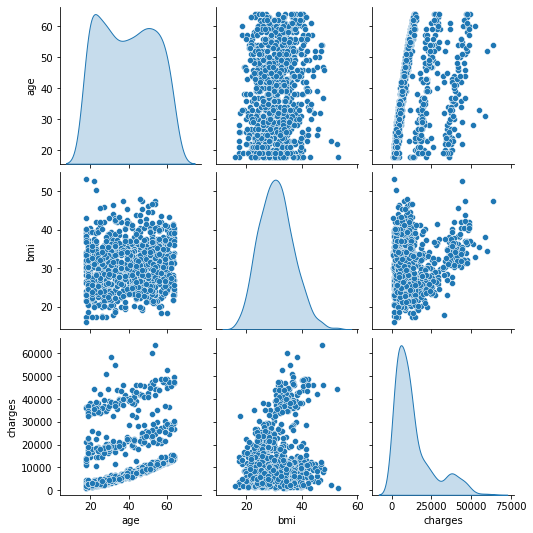

In [12]:
import seaborn as sns
sns.pairplot(data2num, diag_kind='kde')
plt.show()

# insights
-There is linear relationship bet age and charges ,bmi and charges variable

# Visualising Catagorical Variables

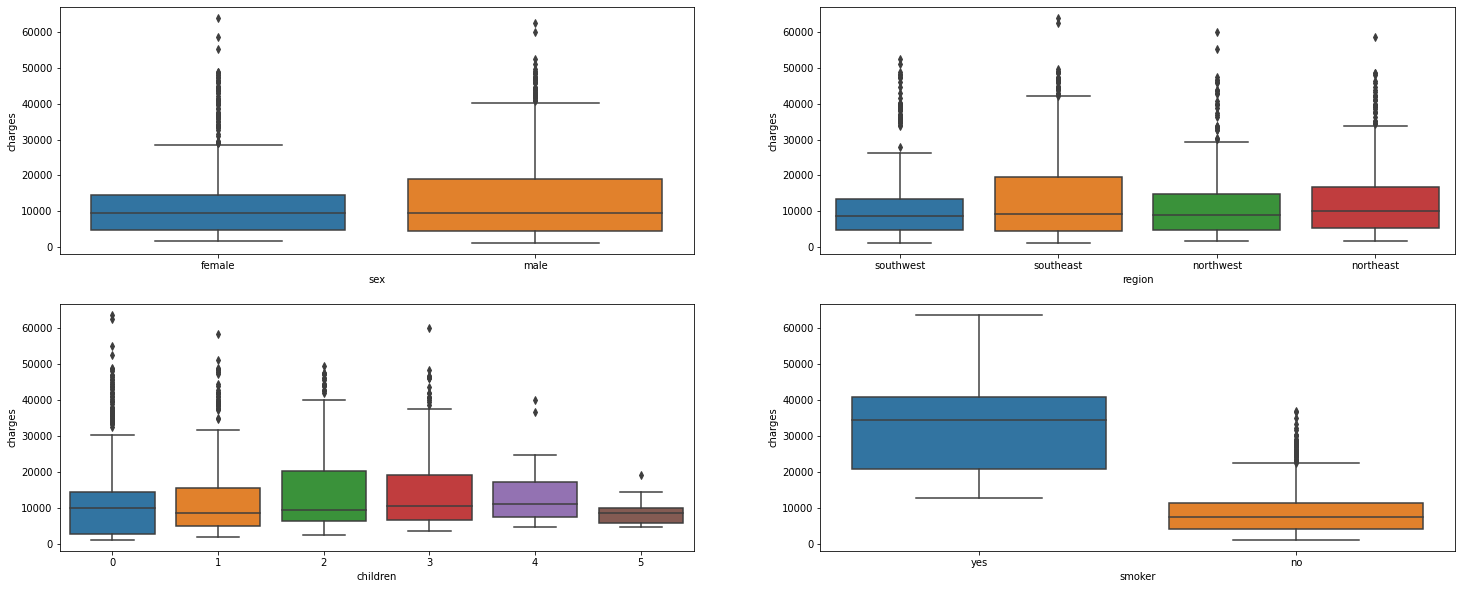

In [13]:
plt.figure(figsize=(25, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'sex', y = 'charges', data = data)
plt.subplot(2,2,2)
sns.boxplot(x = 'region', y = 'charges', data = data)
plt.subplot(2,2,3)
sns.boxplot(x = 'children', y = 'charges', data = data)
plt.subplot(2,2,4)
sns.boxplot(x = 'smoker', y = 'charges', data = data)
plt.show()

# insights
there are 4 categorical varible. policy price varies with there level.

# Correlation plot

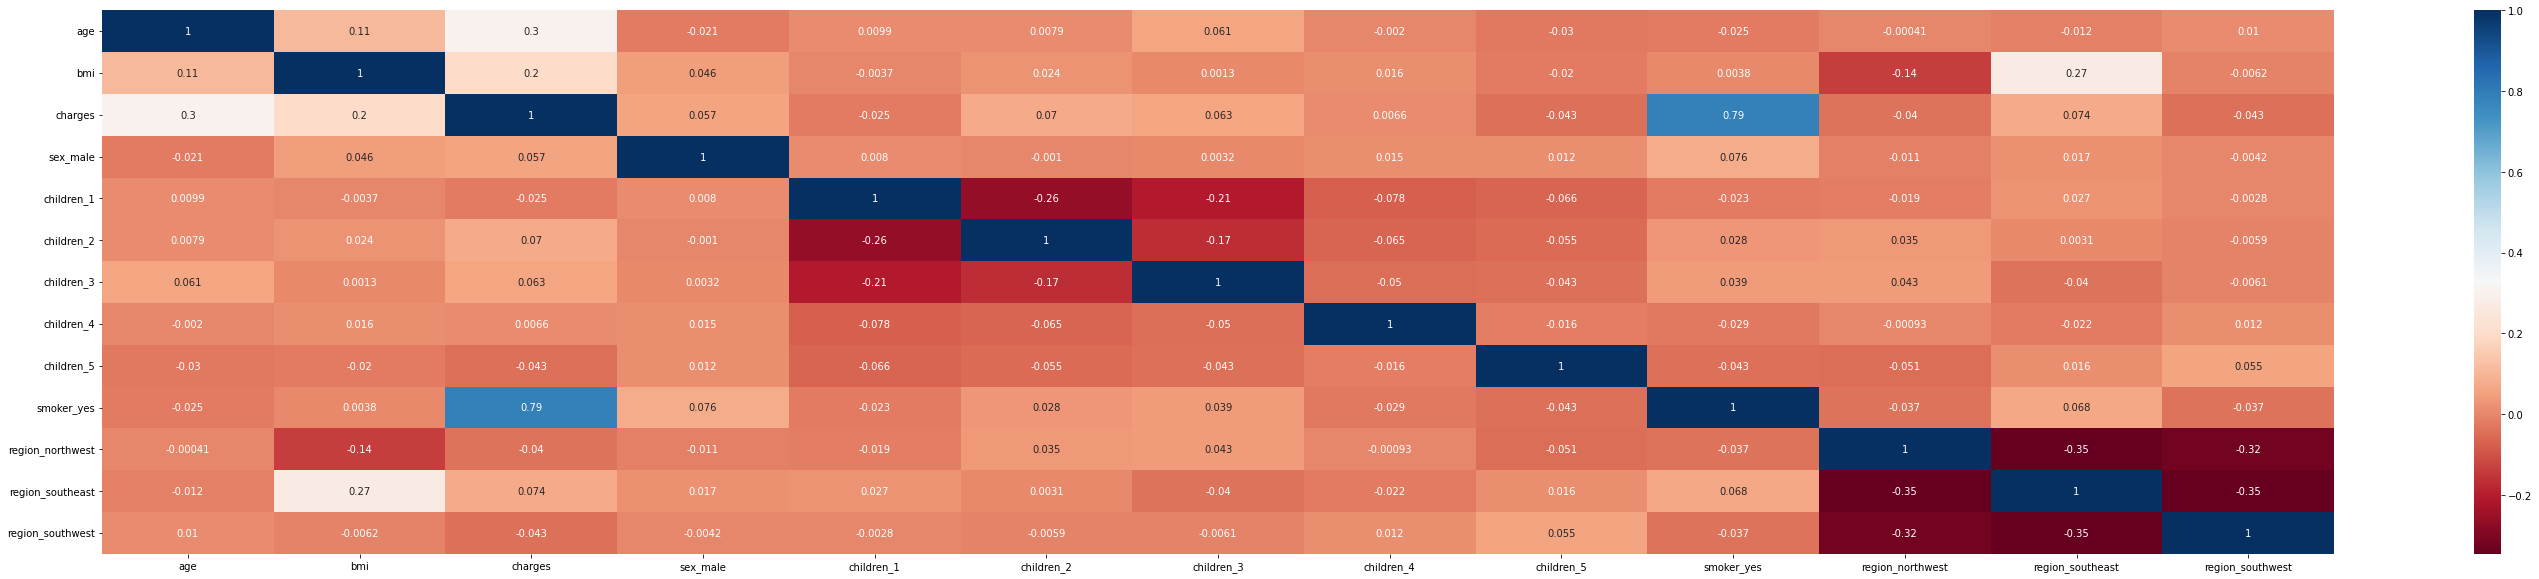

In [14]:
plt.figure(figsize = (50,10))
sns.heatmap(data2.corr(), annot = True, cmap="RdBu")
plt.show()

 There is no correlation between the variables or very low correlation .

In [15]:
data2

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


# feature scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [17]:
df_train.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
522,51,33.915,9866.30485,0,0,0,0,0,0,0,0,0,0
849,55,32.775,10601.63225,1,0,0,0,0,0,0,1,0,0
600,18,39.160,1633.04440,0,0,0,0,0,0,0,0,1,0
314,27,31.400,34838.87300,0,0,0,0,0,0,1,0,0,1
759,18,38.170,36307.79830,1,0,0,0,0,0,1,0,1,0


In [18]:
num_vars=['age','bmi','charges']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [20]:
df_train.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
522,0.717391,0.483051,0.139447,0,0,0,0,0,0,0,0,0,0
849,0.804348,0.452381,0.151186,1,0,0,0,0,0,0,1,0,0
600,0.000000,0.624159,0.008007,0,0,0,0,0,0,0,0,1,0
314,0.195652,0.415389,0.538122,0,0,0,0,0,0,1,0,0,1
759,0.000000,0.597525,0.561572,1,0,0,0,0,0,1,0,1,0


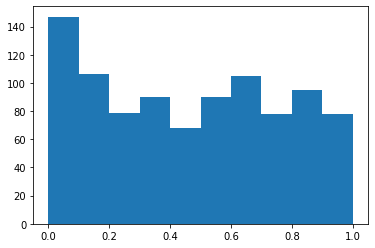

In [24]:

plt.hist(df_train.age)
plt.show()

# separating dependent and independent variable

In [21]:
y_train = df_train.pop('charges')
X_train = df_train

# linear regression model fitting 

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()
lm=lm.fit(X_train, y_train)
rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train);rfe 

RFE(estimator=LinearRegression())

In [24]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', True, 1),
 ('bmi', True, 1),
 ('sex_male', False, 7),
 ('children_1', False, 3),
 ('children_2', True, 1),
 ('children_3', True, 1),
 ('children_4', True, 1),
 ('children_5', False, 2),
 ('smoker_yes', True, 1),
 ('region_northwest', False, 6),
 ('region_southeast', False, 4),
 ('region_southwest', False, 5)]

In [25]:
col = X_train.columns[rfe.support_]
col

Index(['age', 'bmi', 'children_2', 'children_3', 'children_4', 'smoker_yes'], dtype='object')

In [26]:
X_train.columns[~rfe.support_]

Index(['sex_male', 'children_1', 'children_5', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [27]:
X_train_rfe = X_train[col];X_train_rfe.head()

,age,bmi,children_2,children_3,children_4,smoker_yes
522,0.717391,0.483051,0,0,0,0
849,0.804348,0.452381,0,0,0,0
600,0.000000,0.624159,0,0,0,0
314,0.195652,0.415389,0,0,0,1
759,0.000000,0.597525,0,0,0,1


# calculating VIF factor 

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bmi,3.08
0,age,2.76
2,children_2,1.27
5,smoker_yes,1.23
3,children_3,1.17
4,children_4,1.03


 there is no multicolinearity between the ref variable

# Fit ols model and checking significance of variable on the basis of p-value 

In [29]:
import statsmodels.api as sm
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)
# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [30]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     482.0
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          3.32e-281
Time:                        16:48:50   Log-Likelihood:                 864.80
No. Observations:                 936   AIC:                            -1716.
Df Residuals:                     929   BIC:                            -1682.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0560      0.009     -5.942      0.0

# insight:
Here ,pvalue of varialbe children_4 < 0.05 so we remove it and refit the model .

In [31]:
X_train_new = X_train_rfe.drop(["children_4"], axis = 1)

In [32]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bmi,3.06
0,age,2.76
2,children_2,1.26
4,smoker_yes,1.23
3,children_3,1.17


In [33]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [34]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     576.7
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          5.18e-282
Time:                        16:48:54   Log-Likelihood:                 863.41
No. Observations:                 936   AIC:                            -1715.
Df Residuals:                     930   BIC:                            -1686.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0552      0.009     -5.857      0.0

Here pvalue of all the ref variable < 0.05 .and VIF value of all these variable <5 

# Assumption varification 
1)errors are normally distributed
2)no or very few multicollinearity present between explanatory variable 
3)homoscedesticity

In [35]:
y_train_pred = lr2.predict(X_train_lm2)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

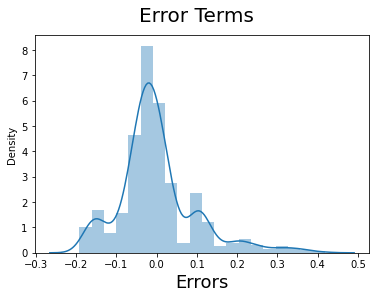

In [36]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

# model fit to test data

In [37]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [38]:
y_test = df_test.pop('charges')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 353 to 658
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               402 non-null    float64
 1   bmi               402 non-null    float64
 2   sex_male          402 non-null    uint8  
 3   children_1        402 non-null    uint8  
 4   children_2        402 non-null    uint8  
 5   children_3        402 non-null    uint8  
 6   children_4        402 non-null    uint8  
 7   children_5        402 non-null    uint8  
 8   smoker_yes        402 non-null    uint8  
 9   region_northwest  402 non-null    uint8  
 10  region_southeast  402 non-null    uint8  
 11  region_southwest  402 non-null    uint8  
dtypes: float64(2), uint8(10)
memory usage: 13.3 KB


In [41]:
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)
X_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 353 to 658
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       402 non-null    float64
 1   age         402 non-null    float64
 2   bmi         402 non-null    float64
 3   children_2  402 non-null    uint8  
 4   children_3  402 non-null    uint8  
 5   smoker_yes  402 non-null    uint8  
dtypes: float64(3), uint8(3)
memory usage: 13.7 KB


In [42]:
y_pred = lr2.predict(X_test_lm5)

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7316009761426518

# model fit to test data with accuracy appox.73%

# inferece: the variable having significant effect on the charges are 
age ,bmi, children_2,children_3 and smoker